In [7]:
import os
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

In [8]:
# Load the saved model
model = tf.keras.models.load_model('./tf-gpu/my_model_finetuned.h5')

column_names = ['image_id'] + [
    "5_o_Clock_Shadow", "Arched_Eyebrows", "Attractive", "Bags_Under_Eyes", "Bald", "Bangs",
    "Big_Lips", "Big_Nose", "Black_Hair", "Blond_Hair", "Blurry", "Brown_Hair", "Bushy_Eyebrows",
    "Chubby", "Double_Chin", "Eyeglasses", "Goatee", "Gray_Hair", "Heavy_Makeup", "High_Cheekbones",
    "Male", "Mouth_Slightly_Open", "Mustache", "Narrow_Eyes", "No_Beard", "Oval_Face", "Pale_Skin",
    "Pointy_Nose", "Receding_Hairline", "Rosy_Cheeks", "Sideburns", "Smiling", "Straight_Hair",
    "Wavy_Hair", "Wearing_Earrings", "Wearing_Hat", "Wearing_Lipstick", "Wearing_Necklace",
    "Wearing_Necktie", "Young"
]

# Define a function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize the image
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Define categories
categories = ['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young']

def update_predictions(image_directory, verbose=False):
    # Create an empty list to store the results for 'Blond hair' and 'Young'
    results = []

    # Loop over each image in the directory and make predictions
    for img_filename in os.listdir(image_directory):
        if img_filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_directory, img_filename)
            
            # Preprocess the image
            img = preprocess_image(img_path)
            
            # Get predictions from the model
            predictions = model.predict(img,verbose=0)  # This will be a 2D array (1, 5), corresponding to the 5 categories
            
            # Translate predictions to dataframe values
            young_pred = predictions[0][4]  # Prediction for 'Young'
            
            # Determine Male and Young values based on threshold
            young_value = 1 if young_pred > 0.5 else -1
            
            # Find the index of the highest hair color prediction
            hair_predictions = predictions[0][:3]  # First three predictions correspond to hair colors (Black, Blond, Brown)
            max_hair_index = np.argmax(hair_predictions)  # Get the index of the highest prediction
            if max_hair_index == 1:
                blond_value = 1  # Blond hair is set to 1
            else:
                blond_value = -1
            
            # Append the prediction results to the list
            results.append([img_filename, blond_value, young_value])
            
            # Optionally print the progress if verbose=True
            if verbose:
                print(f"Processed: {img_filename} | Blond hair: {blond_value}, Young: {young_value}")
    
    # Create a DataFrame with the results
    df = pd.DataFrame(results, columns=['Image Filename', 'Blond hair', 'Young'])
    
    # Return the DataFrame with the predictions
    return df

In a typical machine learning context, accuracy refers to the proportion of correct predictions made by the classifier. In your case, the expected output for all images is "blond hair," and the classifier's prediction for each image is compared to this expected output.

To compute accuracy, you can use the formula: Number of correct predictions/Total number of predictions
 
Here, you are comparing the predicted attribute ("blond hair") against the expected outcome (also "blond hair"). If the classifier predicts "blond hair" correctly for each transformed image, then it would be a correct prediction. If it predicts something other than "blond hair," it would be incorrect.

In [9]:
#accuracy for CelebA single transformation

# Call the update_predictions function to get the DataFrame
df_filtered = update_predictions("./celeba_Orig/reduced/images/single transformation/images",verbose=False)

# Compare the predicted attribute ('Blond_hair') with the expected attribute
correct_predictions = df_filtered['Blond hair'] == 1  

# Calculate accuracy
accuracy = correct_predictions.mean()

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 89.04%


In [10]:
#accuracy for FFHQ single transformation

# Call the update_predictions function to get the DataFrame
df_filtered = update_predictions("./ffhq/reduced/images/single transformation/images",verbose=False)

# Compare the predicted attribute ('Blond_hair') with the expected attribute
correct_predictions = df_filtered['Blond hair'] == 1  

# Calculate accuracy
accuracy = correct_predictions.mean()

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.44%


In [11]:
#accuracy for CelebA multi transformation

# Call the update_predictions function to get the DataFrame
df_filtered = update_predictions("./celeba_Orig/reduced/images/multi transformation/images", verbose=False)

# Expected values are 1 for both "Blond hair" and "Young"
# Compare both predicted attributes ('Blond_hair' and 'Young') with the expected value
correct_predictions_blond = df_filtered['Blond hair'] == 1   # Blond hair expected to be 1
correct_predictions_young = df_filtered['Young'] == 1        # Young expected to be 1

# Calculate accuracy for both Blond hair and Young being correctly predicted
correct_predictions = correct_predictions_blond & correct_predictions_young

# Calculate overall accuracy
accuracy = correct_predictions.mean()

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 75.64%


In [12]:
#accuracy for ffhq multi transformation

# Call the update_predictions function to get the DataFrame
df_filtered = update_predictions("./ffhq/reduced/images/multi transformation/images", verbose=False)

# Expected values are 1 for both "Blond hair" and "Young"
# Compare both predicted attributes ('Blond_hair' and 'Young') with the expected value
# creation of two boolean Series
correct_predictions_blond = df_filtered['Blond hair'] == 1   # Blond hair expected to be 1
correct_predictions_young = df_filtered['Young'] == 1        # Young expected to be 1

# Calculate accuracy for both Blond hair and Young being correctly predicted
correct_predictions = correct_predictions_blond & correct_predictions_young

# Calculate overall accuracy -  computes the proportion of True values in the correct_predictions series
accuracy = correct_predictions.mean()

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 70.84%


C:\Users\Gordts-De Laender\AppData\Local\Temp\ipykernel_18196\2800642155.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transformation', y='Accuracy (%)', data=df_accuracy, palette='Blues_d')


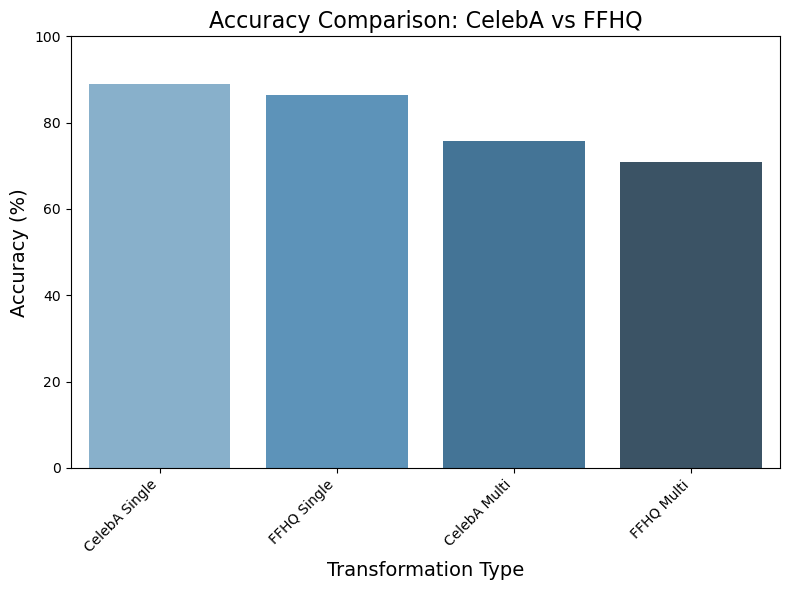

Accuracy Table:
Transformation  Accuracy (%)
 CelebA Single         89.04
   FFHQ Single         86.44
  CelebA Multi         75.64
    FFHQ Multi         70.84


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define the accuracy results
data = {
    'Transformation': ['CelebA Single', 'FFHQ Single', 'CelebA Multi', 'FFHQ Multi'],
    'Accuracy (%)': [89.04, 86.44, 75.64, 70.84]  # These should be the accuracy values you calculated
}

# Create a DataFrame
df_accuracy = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Transformation', y='Accuracy (%)', data=df_accuracy, palette='Blues_d')
plt.title('Accuracy Comparison: CelebA vs FFHQ', fontsize=16)
plt.xlabel('Transformation Type', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# Display the table (this can be included in the paper if needed)
print("Accuracy Table:")
print(df_accuracy.to_string(index=False))

# If you want to save the table to a file
df_accuracy.to_csv('accuracy_comparison.csv', index=False)



In your case, you're interested in evaluating how well StarGAN has transformed images to have blond hair, assuming that the MobileNetV2 classifier works correctly.

The focus here is on StarGAN's transformation performance, where you're using the MobileNetV2 classifier as a tool to validate that all images have blond hair after the transformation.

Clarification of the Setup:
Expected output (StarGAN transformation): You used StarGAN to transform images such that they should now all have blond hair.

MobileNetV2 classifier: The MobileNetV2 classifier was fine-tuned to identify whether an image contains blond hair. You're using this classifier as a way to check the effectiveness of StarGAN's transformation.

Evaluation of StarGAN's transformation performance: Your goal is to check how well StarGAN performed in transforming all images to contain blond hair. You assume the MobileNetV2 classifier is perfect, so you're using it to verify if all the transformed images have blond hair or not.

Can you create a Confusion Matrix for this?
Yes, you can create a confusion matrix in this context, even though you're not directly measuring the performance of the MobileNetV2 classifier itself. You would be evaluating StarGAN's transformation effectiveness by comparing the expected output (blond hair) to the predicted output from the MobileNetV2 classifier.

Key Points:
The expected output for all images is that they should contain blond hair after the transformation.
The predicted output from the classifier is whether it detects blond hair in the image (either 1 for "blond hair" or 0 for "no blond hair").
In this case, your confusion matrix would represent:

True Positives (TP): The number of transformed images that the classifier correctly identifies as having blond hair (expected 1, predicted 1).
False Negatives (FN): The number of transformed images that the classifier fails to identify as having blond hair (expected 1, predicted 0).
True Negatives (TN): Since you assume all the transformed images should contain blond hair, there will not be any true negatives.
False Positives (FP): Similarly, there will not be any false positives, because all images should be considered as containing blond hair after transformation.
The Structure of the Confusion Matrix:
Since all transformed images should contain blond hair, the confusion matrix in your case will primarily focus on how many images were:

Correctly classified as having blond hair (True Positives).
Incorrectly classified as not having blond hair (False Negatives).
The confusion matrix will likely look like this:

lua
Code kopiëren
Confusion Matrix:
[[  0, FN],  # 0 True Negatives, FN False Negatives
 [  0, TP]]  # 0 False Positives, TP True Positives
Where:

TP (True Positives): The number of images where the classifier correctly detected blond hair (i.e., the transformed image indeed has blond hair, and the classifier predicted it as 1).
FN (False Negatives): The number of images where the classifier incorrectly predicted no blond hair (i.e., the transformed image should have blond hair, but the classifier predicted 0).
Example:
Imagine you transformed 100 images using StarGAN, and you used MobileNetV2 to classify them. Let's say:

80 images are correctly classified by the MobileNetV2 classifier as having blond hair (True Positives).
20 images are incorrectly classified by the classifier as not having blond hair (False Negatives).
Then, your confusion matrix would look like this:

lua
Code kopiëren
Confusion Matrix:
[[  0,  20],  # 0 True Negatives, 20 False Negatives
 [  0,  80]]  # 0 False Positives, 80 True Positives
True Positives (TP) = 80 (correctly predicted as blond hair).
False Negatives (FN) = 20 (missed predictions, where the image was expected to have blond hair but the classifier predicted otherwise).

Confusion Matrix:
[[   0    0]
 [ 219 1780]]
F1 Score: 0.9420


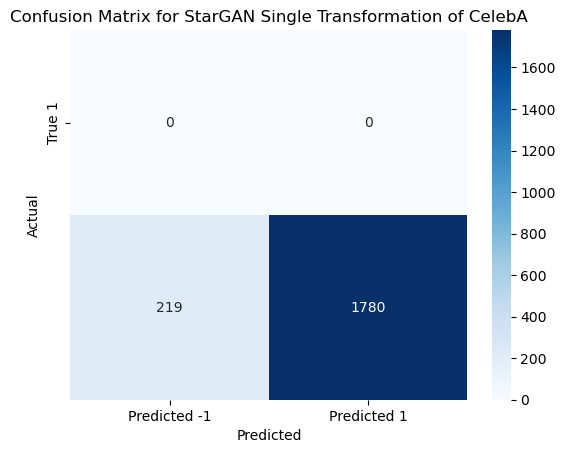

In [13]:
#confusion matrix and F1 for CelebA single transformation
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Call the update_predictions function to get the DataFrame
df_filtered = update_predictions("./celeba_Orig/reduced/images/single transformation/images", verbose=False)

# The expected output is always 1 (blond hair), so we create a series of 1s for the expected values
y_true = [1] * len(df_filtered)  # All images should have blond hair

# Predicted output from classifier (either 1 or -1)
y_pred = df_filtered['Blond hair'].values  # This should be 1 or -1

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

# Print the F1 score
print(f"F1 Score: {f1:.4f}")

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted -1", "Predicted 1"], yticklabels=["True 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for StarGAN Single Transformation of CelebA')
plt.show()


Confusion Matrix:
[[   0    0]
 [ 271 1728]]
F1 Score: 0.9273


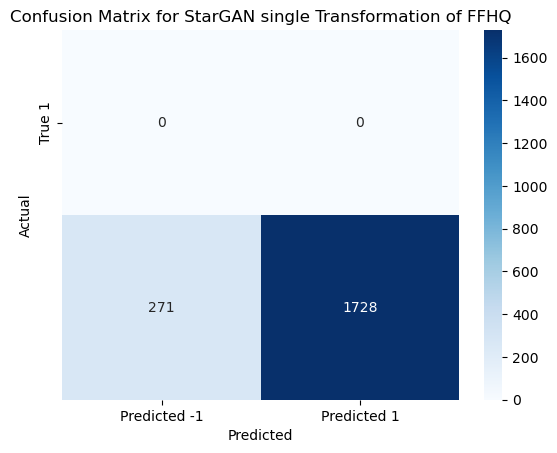

In [14]:
#confusion matrix and F1 for FFHQ single transformation
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Call the update_predictions function to get the DataFrame
df_filtered = update_predictions("./ffhq/reduced/images/single transformation/images", verbose=False)

# The expected output is always 1 (blond hair), so we create a series of 1s for the expected values
y_true = [1] * len(df_filtered)  # All images should have blond hair

# Predicted output from classifier (either 1 or -1)
y_pred = df_filtered['Blond hair'].values  # This should be 1 or -1

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

# Print the F1 score
print(f"F1 Score: {f1:.4f}")

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted -1", "Predicted 1"], yticklabels=["True 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for StarGAN single Transformation of FFHQ')
plt.show()


Confusion Matrix:
[[   0    0]
 [ 487 1512]]
F1 Score: 0.8613


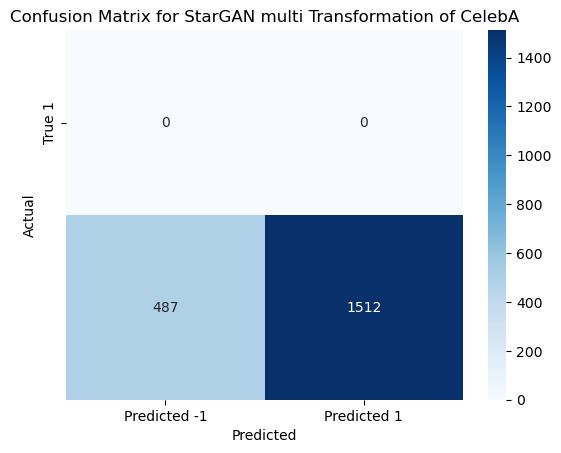

In [15]:
#confusion matrix and F1 for CelebA multi transformation
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Call the update_predictions function to get the DataFrame
df_filtered = update_predictions("./celeba_Orig/reduced/images/multi transformation/images", verbose=False)

# The expected output is always 1 (blond hair and young), so we create a series of 1s for the expected values
y_true = [1] * len(df_filtered)  # All images should have both blond hair and young as 1

# Predicted output: both 'Blond hair' and 'Young' must be 1
y_pred = (df_filtered['Blond hair'] == 1) & (df_filtered['Young'] == 1)  # Both conditions need to be True

# Convert y_pred to 1 or -1 (1 for correct, -1 for incorrect)
y_pred = y_pred.astype(int) * 2 - 1  # Convert to 1 (True) or -1 (False)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

# Print the F1 score
print(f"F1 Score: {f1:.4f}")

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted -1", "Predicted 1"], yticklabels=["True 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for StarGAN multi Transformation of CelebA')
plt.show()


Confusion Matrix:
[[   0    0]
 [ 583 1416]]
F1 Score: 0.8293


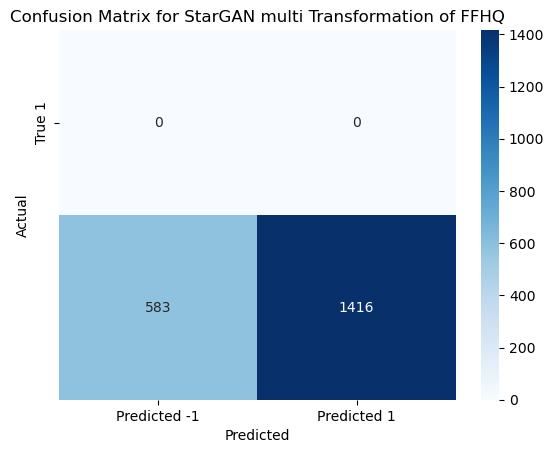

In [16]:
#confusion matrix and F1 for CelebA multi transformation
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Call the update_predictions function to get the DataFrame
df_filtered = update_predictions("./ffhq/reduced/images/multi transformation/images", verbose=False)

# The expected output is always 1 (blond hair and young), so we create a series of 1s for the expected values
y_true = [1] * len(df_filtered)  # All images should have both blond hair and young as 1

# Predicted output: both 'Blond hair' and 'Young' must be 1
y_pred = (df_filtered['Blond hair'] == 1) & (df_filtered['Young'] == 1)  # Both conditions need to be True

# Convert y_pred to 1 or -1 (1 for correct, -1 for incorrect)
y_pred = y_pred.astype(int) * 2 - 1  # Convert to 1 (True) or -1 (False)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

# Print the F1 score
print(f"F1 Score: {f1:.4f}")

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted -1", "Predicted 1"], yticklabels=["True 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for StarGAN multi Transformation of FFHQ')
plt.show()


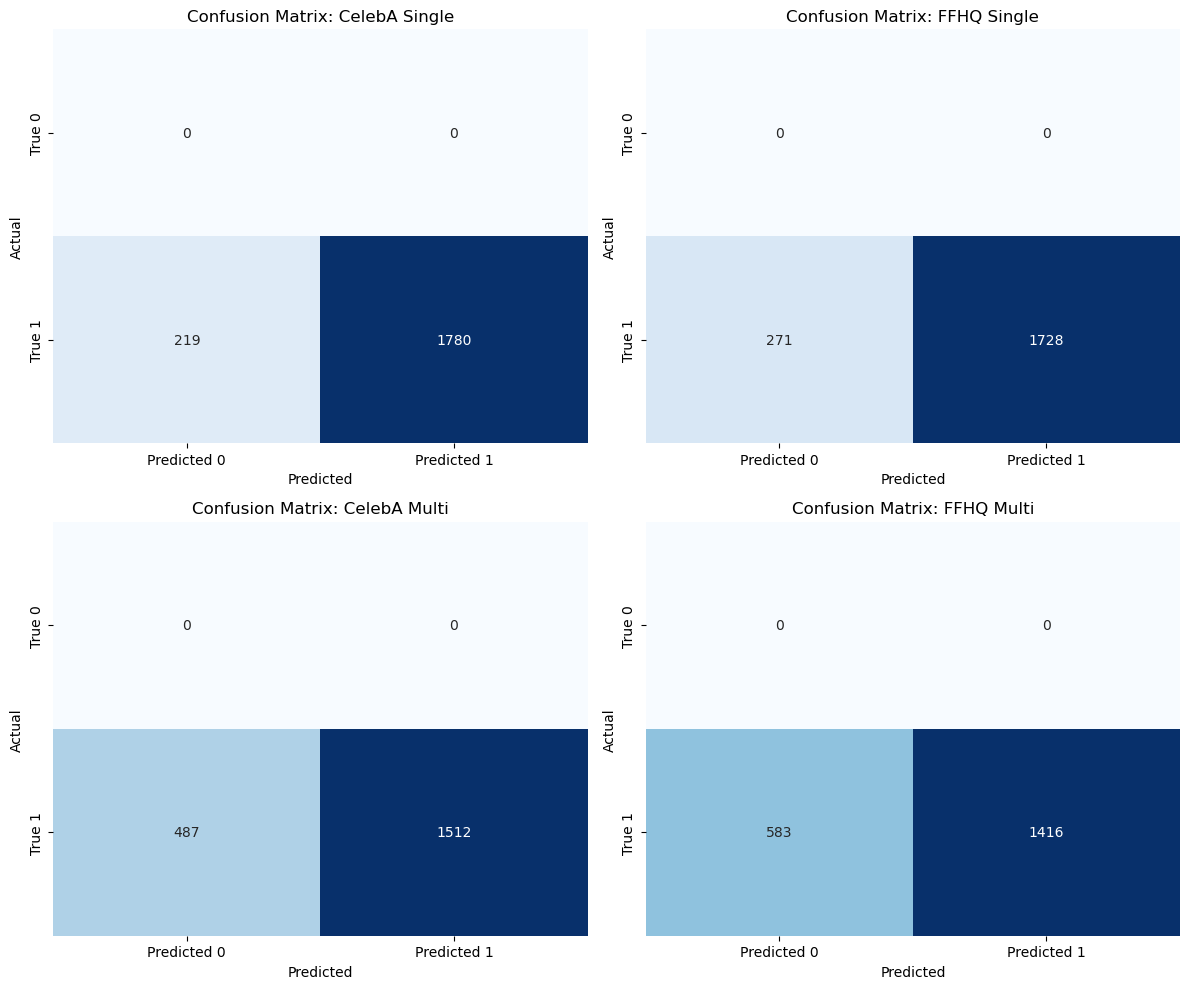

C:\Users\Gordts-De Laender\AppData\Local\Temp\ipykernel_18196\2327993009.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transformation', y='F1 Score', data=df_f1_scores, palette='coolwarm')


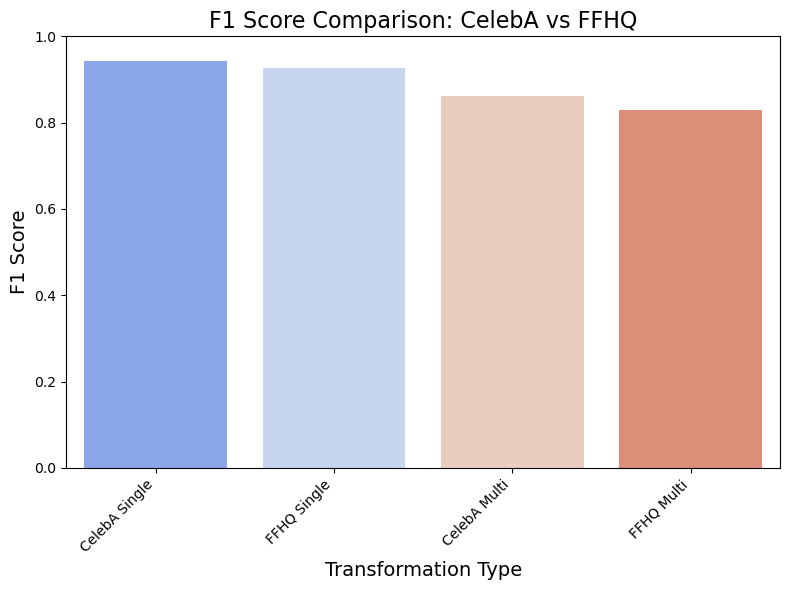

F1 Scores Table:
Transformation  F1 Score
 CelebA Single    0.9420
   FFHQ Single    0.9273
  CelebA Multi    0.8613
    FFHQ Multi    0.8293


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score

# Example confusion matrix data (from your previous results)
conf_matrices = {
    'CelebA Single': np.array([[0, 0], [219, 1780]]),
    'FFHQ Single': np.array([[0, 0], [271, 1728]]),
    'CelebA Multi': np.array([[0, 0], [487, 1512]]),
    'FFHQ Multi': np.array([[0, 0], [583, 1416]])
}

# F1 scores (from your previous results)
f1_scores = {
    'CelebA Single': 0.9420,
    'FFHQ Single': 0.9273,
    'CelebA Multi': 0.8613,
    'FFHQ Multi': 0.8293
}

# Plotting Confusion Matrices as Heatmaps
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Loop through each confusion matrix and plot it
for idx, (key, cm) in enumerate(conf_matrices.items()):
    ax = axes[idx // 2, idx % 2]  # Determine the correct subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"], 
                ax=ax)
    ax.set_title(f'Confusion Matrix: {key}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Creating a DataFrame for F1 scores
f1_data = {
    'Transformation': ['CelebA Single', 'FFHQ Single', 'CelebA Multi', 'FFHQ Multi'],
    'F1 Score': [f1_scores['CelebA Single'], f1_scores['FFHQ Single'], f1_scores['CelebA Multi'], f1_scores['FFHQ Multi']]
}

# Convert to DataFrame
df_f1_scores = pd.DataFrame(f1_data)

# Plotting the F1 Scores as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Transformation', y='F1 Score', data=df_f1_scores, palette='coolwarm')
plt.title('F1 Score Comparison: CelebA vs FFHQ', fontsize=16)
plt.xlabel('Transformation Type', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.ylim(0, 1)  # F1 Score is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Displaying the F1 scores in a table
print("F1 Scores Table:")
print(df_f1_scores.to_string(index=False))

# Optionally, save the F1 scores table to CSV
df_f1_scores.to_csv('f1_score_comparison.csv', index=False)


 Testing Generalizability Qualitatively (Solo Method)
To test generalizability qualitatively, you can focus on evaluating how well the StarGAN transformations align with your expectations for the transformed attributes. This can be done through visual inspection of the transformed images, assessing whether the generated attributes are consistent with your intended transformation (blond hair, young, etc.).

A. Visual Inspection:
Select Random Samples: Choose a subset of transformed images and inspect them manually.

Example: Choose 10 images for single-attribute transformations and 10 for multi-attribute transformations.
For each image, inspect if the "blond hair" and "young" attributes appear as intended.
Side-by-Side Comparison: Show the original image alongside the transformed image to assess whether the change is clear and corresponds to the desired attributes.

Assess Consistency: Check whether the transformation maintains natural-looking images. For example, after the "blond hair" transformation, is the hair color realistic? Does the subject still look young?

B. Self-Assessment:
You can use various self-assessment techniques to rate the transformations:

Visual Consistency Score: Give each image a score from 1 to 10 based on how well the transformation matches the target attribute (blond hair, young).
Image Quality: Rate the overall quality of the generated images in terms of realism (naturalness of the transformed images).
C. Attribute Matching:
Even without a panel, you can create a simple rule-based system for checking attribute consistency:

For each transformed image, check whether the target attributes are clearly visible (e.g., does the hair look blond, does the person look younger?). This can be done by setting a threshold for how "blond" the hair should appear or how much younger the person looks.

To rigorously assess the generalizability of the StarGAN transformations beyond the CelebA dataset, comparing the predictions of your MobileNetV2 classifier on CelebA and FFHQ transformed images is a crucial step. This comparison will help you understand whether the classifier can accurately predict the attributes in the FFHQ dataset after the transformation and whether the transformation is equally effective across datasets.

Here's why and how you should do that:

Why Compare Classifier Predictions on CelebA and FFHQ Transformations?
Cross-Dataset Generalization: You trained your MobileNetV2 classifier on CelebA, and now you are applying it to FFHQ images. By comparing the classifier’s predictions on transformed CelebA images vs. transformed FFHQ images, you can evaluate whether the transformations learned on CelebA generalize well to FFHQ. If the classifier performs similarly on both datasets, it suggests that the transformation (via StarGAN) is robust across these datasets.

Evaluating the Impact of Domain Shift: CelebA and FFHQ are from different domains (CelebA has more variation in facial attributes, and FFHQ has more realistic, high-resolution images). If StarGAN works well on both datasets and the classifier still predicts the correct attributes, it indicates that the transformation model is generalizing well across domains. If the performance on FFHQ drops significantly, it may indicate that the StarGAN model is overfitting to CelebA, or the transformations aren't as effective for the FFHQ domain.

How to Compare Classifier Predictions for CelebA and FFHQ Transformations
You’ll be comparing the classifier’s predictions on both the transformed CelebA images and the transformed FFHQ images for the target attributes (blond hair, young, etc.). Here's how you can structure this:

Run the Classifier on Both Transformed CelebA and FFHQ Images:

For each set of transformed images (CelebA and FFHQ), predict the attributes using your trained MobileNetV2 classifier.
Compare the Predictions:

Compare how well the model predicts the expected attributes in both CelebA and FFHQ images after the transformation. You will look at metrics such as accuracy, F1 score, confusion matrices, etc., for both datasets.

Key Takeaways from the Comparison:
Accuracy and F1 Scores: A significant drop in accuracy or F1 score on FFHQ images compared to CelebA images would suggest that the StarGAN transformations (or the classifier's performance) are not generalizing well beyond CelebA.

Confusion Matrices: If the confusion matrices for the transformed FFHQ images are substantially different from those for CelebA, it may indicate that the transformation has a different effect on FFHQ images, or the classifier isn't well-calibrated to predict attributes on FFHQ after transformation.

Precision-Recall Curves: You can also compare how well the model identifies true positives (for instance, correctly identifying "blond hair" on FFHQ compared to CelebA), especially if your dataset is imbalanced.

Conclusion:
By comparing classifier predictions on transformed CelebA and FFHQ images, you are directly assessing the generalizability of the StarGAN transformations. This gives you a more rigorous evaluation of whether the transformations learned on CelebA can be applied to FFHQ effectively, ensuring your approach is not overfitting to the CelebA dataset and is robust to different data distributions.

To perform a quantitative evaluation of your MobileNetV2 classifier on the before and after pictures of the single-attribute and multi-attribute transformations (for both CelebA and FFHQ datasets), you will compare the classifier’s predictions on the transformed images with the actual labels. You can use standard metrics like accuracy, F1-score, and precision-recall curves to assess how well the classifier performs on both datasets before and after transformation.

Here is a code outline that compares the classifier's performance on before vs after transformation images for both CelebA and FFHQ datasets:

Conclusion:
By using the code above, you can quantitatively evaluate the generalizability of your StarGAN transformations across both CelebA and FFHQ datasets. You will compare accuracy, F1 score, precision-recall curves, and confusion matrices for both before and after transformations on both datasets. This will give you a robust assessment of how well the transformation generalizes from CelebA to FFHQ and how effective the classifier is at predicting the transformed attributes.